In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [2]:
#sample dataset for housing prices. ## EXAMPLE
X_train = np.array([1,2,3,4,5,6,7,8,9,10])
y_train = np.array([100,200,300,400,500,600,700,800,900,1000])

In [3]:
X_train.shape,y_train.shape

((10,), (10,))

Text(0, 0.5, 'House price (in 100000)')

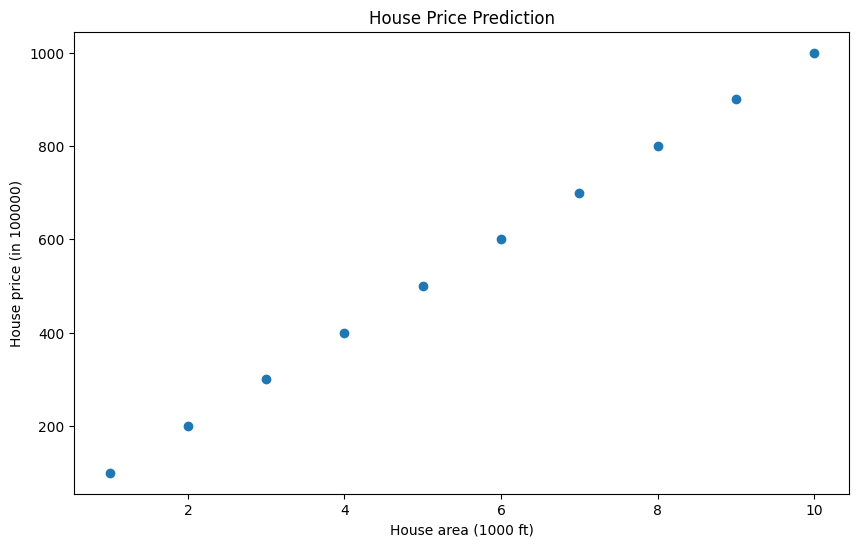

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train)
plt.title("House Price Prediction")
plt.xlabel("House area (1000 ft)")
plt.ylabel("House price (in 100000)")

In [5]:
w = 96
b = 30

In [6]:
def LinearRegression(x,w,b,y):
    m = x.shape[0]
    # print(m)
    f_wb = np.zeros(m)
    # f_wb[2] = 100
    # print(f_wb)
    # return 
    cost_sum = 0
    for i in range(m):
        #linear regression
        f_wb[i] = w*x[i]+b
        #cost function
        cost = (f_wb[i]-y[i])**2
        cost_sum = cost+cost_sum
    total_cost = total_cost = (1 / (2 * m)) * cost_sum
    return f_wb,total_cost


In [7]:
linearRegression_result,total_cost= LinearRegression(X_train,w,b,y_train)

In [8]:
linearRegression_result

array([126., 222., 318., 414., 510., 606., 702., 798., 894., 990.])

In [9]:
total_cost

98.0

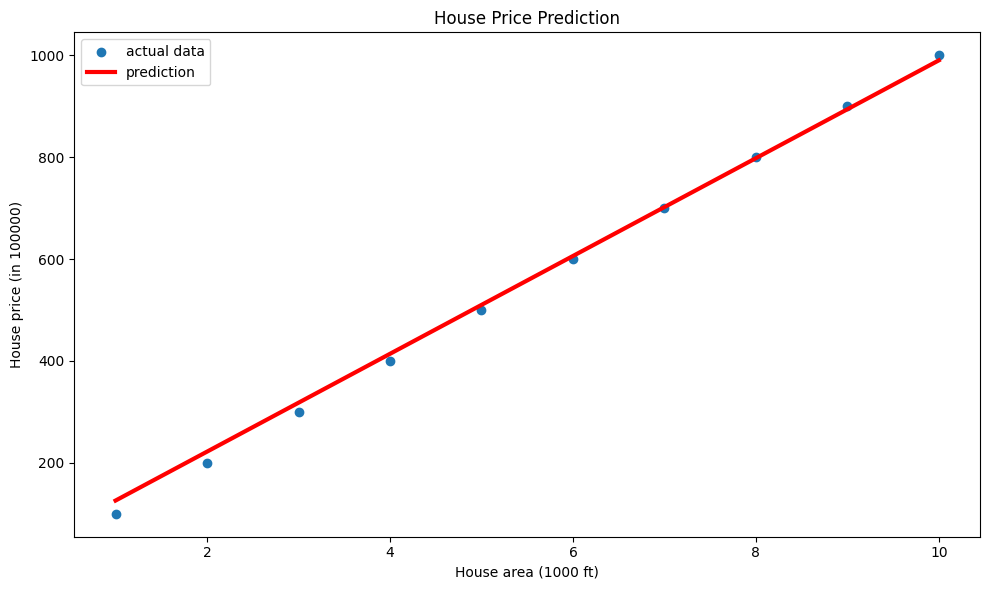

In [10]:
### PLOTTING THE GRAPH
plt.figure(figsize=(10,6))

plt.scatter(X_train,y_train,label="actual data")
plt.plot(X_train,linearRegression_result,label="prediction",c='red',linewidth=3)
# sns.lineplot(linearRegression_result)
plt.title("House Price Prediction")
plt.xlabel("House area (1000 ft)")
plt.ylabel("House price (in 100000)")
plt.legend()
plt.tight_layout()
plt.show()

### Gradient Descent

In [24]:
class GradientDescent:
    def __init__(self,X,y,w,b):
        self.x = X
        self.y = y
        self.w = w
        self.b=  b
        self.m = X.shape[0]

    #since we are storing cost function, lets calculate it 
    def cost_function(self):
        predictions = self.w * self.x + self.b
        errors = predictions - self.y
        cost = (1 / (2 * self.m)) * np.sum(errors ** 2)
        return cost
        
    def compute_gradient(self):
        dj_dw = 0
        dj_db = 0
        for i in range(self.m):
            f_wb = self.w*self.x[i]+self.b
            dj_dw_i = (f_wb-self.y[i])*self.x[i]
            dj_db_i = (f_wb-self.y[i])
            dj_dw += dj_dw_i
            dj_db += dj_db_i
        dj_dw = dj_dw/self.m
        dj_db = dj_db/self.m
        return dj_dw,dj_db

    def gradient_descent(self,num_iters,alpha):
        #history of cost values
        j_history = [] 
        # history of parameter values 
        p_history =[]
        # w = self.w
        # b = self.b
        for i in range(num_iters):
            dj_dw,dj_db = self.compute_gradient()
            self.w = self.w - alpha*dj_dw
            self.b = self.b - alpha*dj_db
            if i < 10000:
                j_history.append(self.cost_function())
                p_history.append([self.w,self.b])
            
            if i% math.ceil(num_iters/10) == 0:
                print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
                f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                f"w: {self.w: 0.3e}, b:{self.b: 0.5e}")
        return self.w,self.b,j_history,p_history
            
            
        
        


In [25]:
gradientDescent = GradientDescent(X_train,y_train,w,b)

In [26]:
total_cost = gradientDescent.cost_function()


In [27]:
total_cost

5.559597157527111e-17

In [31]:
w,b,j_hist,p_hist = gradientDescent.gradient_descent(num_iters=1000000,alpha=0.01)

Iteration    0: Cost 2.64e-22  dj_dw: -7.089e-11, dj_db:  1.421e-15   w:  1.000e+02, b: 4.72653e-11
Iteration 100000: Cost 9.37e-27  dj_dw: -3.865e-13, dj_db:  0.000e+00   w:  1.000e+02, b: 2.91309e-13
Iteration 200000: Cost 9.37e-27  dj_dw: -3.865e-13, dj_db:  0.000e+00   w:  1.000e+02, b: 2.91309e-13
Iteration 300000: Cost 9.37e-27  dj_dw: -3.865e-13, dj_db:  0.000e+00   w:  1.000e+02, b: 2.91309e-13
Iteration 400000: Cost 9.37e-27  dj_dw: -3.865e-13, dj_db:  0.000e+00   w:  1.000e+02, b: 2.91309e-13
Iteration 500000: Cost 9.37e-27  dj_dw: -3.865e-13, dj_db:  0.000e+00   w:  1.000e+02, b: 2.91309e-13
Iteration 600000: Cost 9.37e-27  dj_dw: -3.865e-13, dj_db:  0.000e+00   w:  1.000e+02, b: 2.91309e-13
Iteration 700000: Cost 9.37e-27  dj_dw: -3.865e-13, dj_db:  0.000e+00   w:  1.000e+02, b: 2.91309e-13
Iteration 800000: Cost 9.37e-27  dj_dw: -3.865e-13, dj_db:  0.000e+00   w:  1.000e+02, b: 2.91309e-13
Iteration 900000: Cost 9.37e-27  dj_dw: -3.865e-13, dj_db:  0.000e+00   w:  1.000e+0

In [32]:
b

2.913085086757076e-13

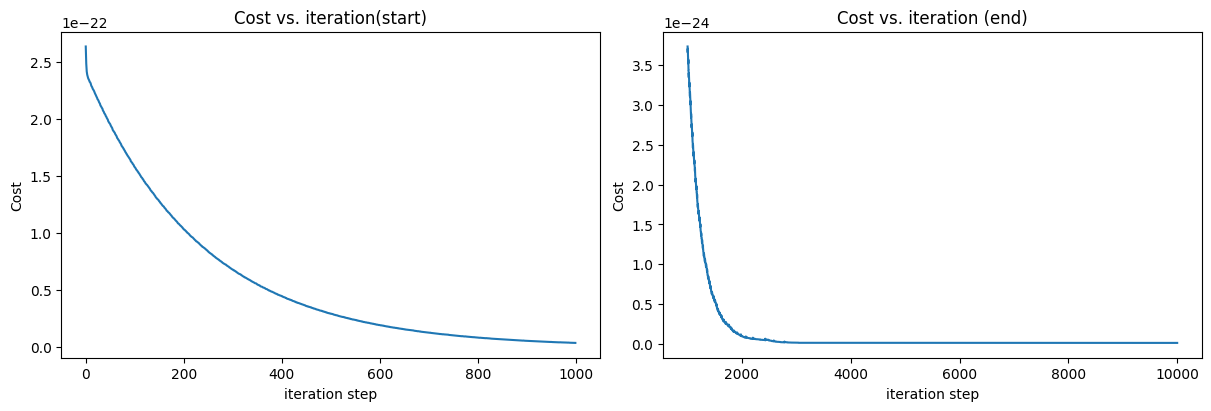

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_hist[:1000])
ax2.plot(1000 + np.arange(len(j_hist[1000:])), j_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [49]:
p_hist


[[99.99999999999211, 4.7265288769775954e-11],
 [99.99999999999255, 4.7226365238711016e-11],
 [99.99999999999282, 4.7163851688818844e-11],
 [99.999999999993, 4.708680043455302e-11],
 [99.99999999999311, 4.700142161942409e-11],
 [99.99999999999318, 4.691069952292224e-11],
 [99.99999999999322, 4.6816581032143454e-11],
 [99.99999999999325, 4.672106987760258e-11],
 [99.99999999999328, 4.662507555400139e-11],
 [99.9999999999933, 4.652864069390403e-11],
 [99.99999999999332, 4.643156634534448e-11],
 [99.99999999999334, 4.633480463558867e-11],
 [99.99999999999335, 4.62378013413027e-11],
 [99.99999999999336, 4.6141110685820463e-11],
 [99.99999999999338, 4.604459056059481e-11],
 [99.99999999999339, 4.5948383074172895e-11],
 [99.9999999999934, 4.585248822655471e-11],
 [99.99999999999342, 4.5756749698338394e-11],
 [99.99999999999343, 4.566132380892581e-11],
 [99.99999999999345, 4.5565642124128353e-11],
 [99.99999999999346, 4.547013096958748e-11],
 [99.99999999999348, 4.537491824299563e-11],
 [99.99

In [50]:
def compute_cost(x, y, w, b):
    m = x.shape[0]  
    total_cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        total_cost += (f_wb - y[i])**2

    cost = total_cost / (2 * m)
    return cost


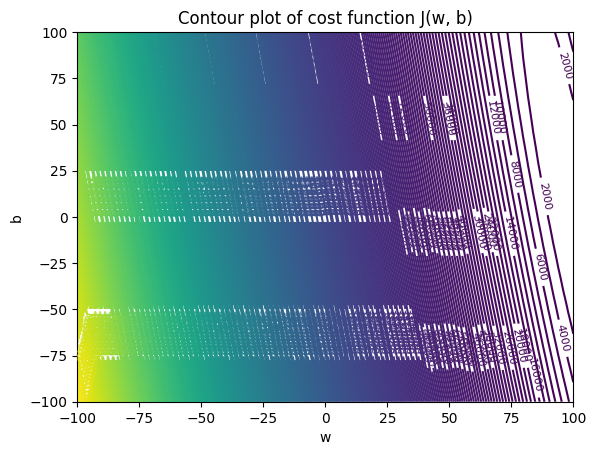

In [61]:
w_vals = np.linspace(-100, 100, 100)
b_vals = np.linspace(-100, 100, 100)
# J_vals = np.zeros((len(w_vals), len(b_vals)))
Z = np.zeros_like(W)

# 2. Compute cost for each (w, b)
for i in range(len(w_vals)):
    for j in range(len(b_vals)):
         Z[i, j] = compute_cost(X_train, y_train, W[i, j], B[i, j])

# 3. Create meshgrid
W, B = np.meshgrid(w_vals, b_vals)
cp = plt.contour(W,B,Z, levels=500, cmap='viridis')  # `.T` to match dimensions
plt.clabel(cp, inline=True, fontsize=8)
# p_history = np.array(p_hist)
# print(p_history)
# plt.plot(p_history[:, 0], p_history[:, 1], marker='x', color='red')
plt.xlabel('w')
plt.ylabel('b')
plt.title('Contour plot of cost function J(w, b)')
plt.show()